## EXPLORATORY DATA ANALYSIS

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Define paths relative to the notebook location
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
PROCESSED_DIR = os.path.join(BASE_DIR, "data", "processed")
DATA_FILE = os.path.join(PROCESSED_DIR, "IBM_processed.parquet")

# Load the processed data
df = pd.read_parquet(DATA_FILE)
print("Data loaded successfully. Shape:", df.shape)
df.head()

Data loaded successfully. Shape: (6372, 6)


,Date,Open,High,Low,Close,Volume
0,1999-11-01,98.50,98.81,96.37,96.75,9551800
1,1999-11-02,96.75,96.81,93.69,94.81,11105400
2,1999-11-03,95.87,95.94,93.50,94.37,10369100
3,1999-11-04,94.44,94.44,90.00,91.56,16697600
4,1999-11-05,92.75,92.94,90.19,90.25,13737600


In [17]:
# Data Overview
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6372 entries, 0 to 6371
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6372 non-null   datetime64[ns]
 1   Open    6372 non-null   float64       
 2   High    6372 non-null   float64       
 3   Low     6372 non-null   float64       
 4   Close   6372 non-null   float64       
 5   Volume  6372 non-null   int64         
 6   MA50    6323 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 348.6 KB


In [18]:
print("\nDataset description:")
df.describe()


Dataset description:


,Date,Open,High,Low,Close,Volume,MA50
count,6372,6372.000000,6372.000000,6372.000000,6372.000000,6.372000e+03,6323.000000
mean,2012-06-30 20:40:00,133.047217,134.249693,131.921279,133.112326,5.882404e+06,132.792276
min,1999-11-01 00:00:00,54.650000,56.700000,54.010000,55.070000,1.027500e+06,69.377400
25%,2006-03-05 06:00:00,102.055000,103.750000,100.752500,102.250000,3.724686e+06,103.077000
50%,2012-06-28 12:00:00,129.465000,130.470000,128.400000,129.490000,5.036950e+06,129.132250
75%,2018-10-26 18:00:00,158.725000,159.962500,157.597500,158.680000,7.083150e+06,158.066500
max,2025-03-03 00:00:00,265.710000,265.720000,262.150000,264.740000,4.120730e+07,238.309800
std,NaN,37.940737,38.048281,37.832230,37.964690,3.294666e+06,36.952541


In [19]:
print("\nMissing Values")
df.isnull().sum()


Missing Values


Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
MA50      49
dtype: int64

In [20]:
print("Data types:")
df.dtypes

Data types:


Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
MA50             float64
dtype: object

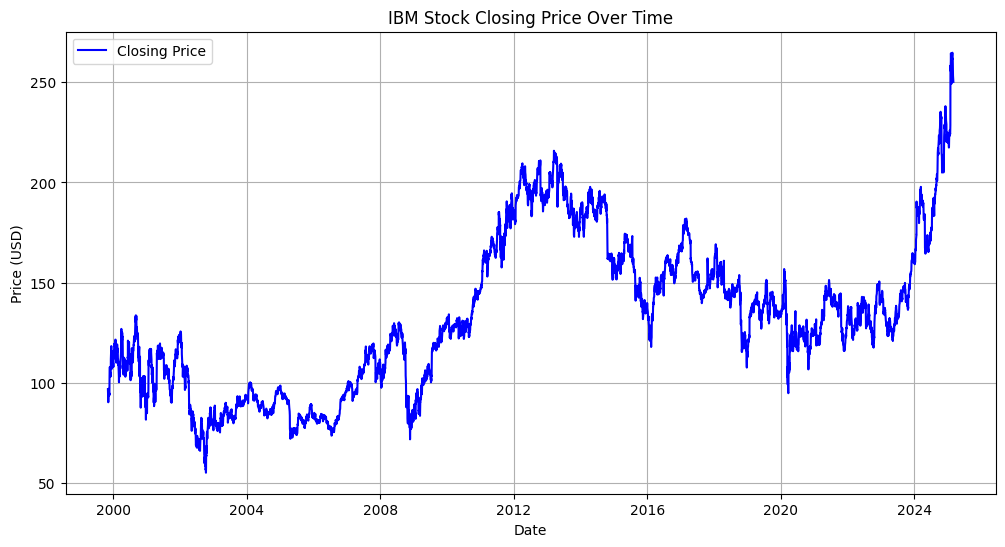

In [11]:
# Time Series plot
df["Date"] = pd.DataFrame(df["Date"])
plt.figure(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.plot(df["Date"], df["Close"], label="Closing Price", color="blue")
plt.title("IBM Stock Closing Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

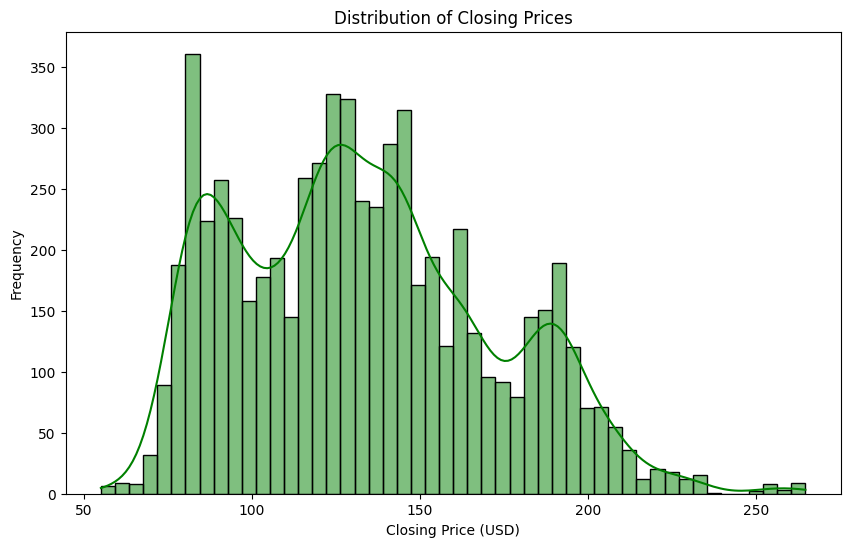

In [12]:
# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df["Close"], bins=50, kde=True, color="green")
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price (USD)")
plt.ylabel("Frequency")
plt.show

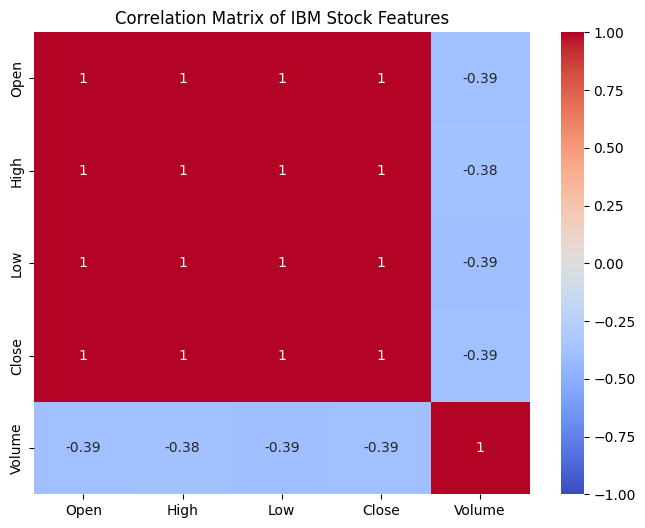

In [14]:
# Correlation Heatmap
corr = df[["Open", "High", "Low", "Close", "Volume"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of IBM Stock Features")
plt.show()

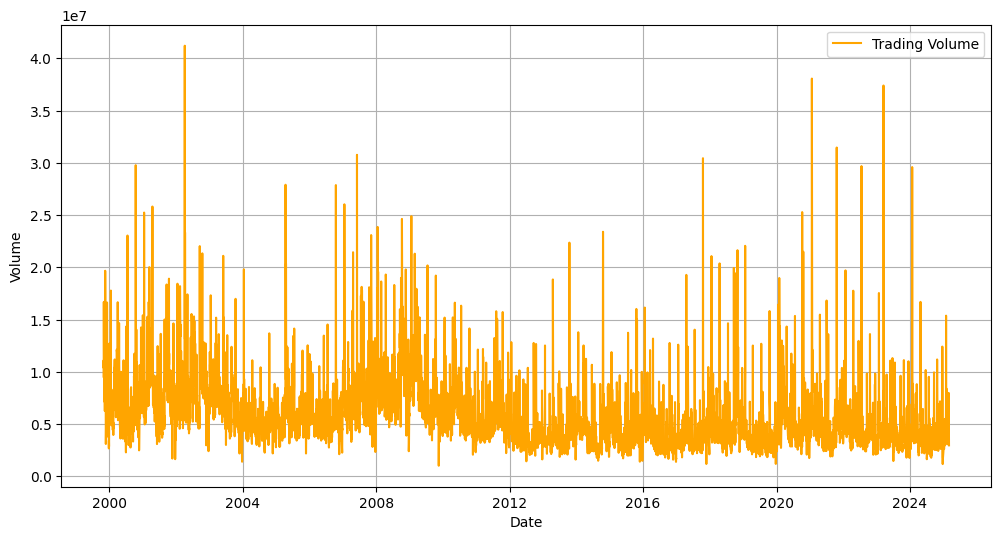

In [15]:
# Volume Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Volume"], label="Trading Volume", color="orange")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()

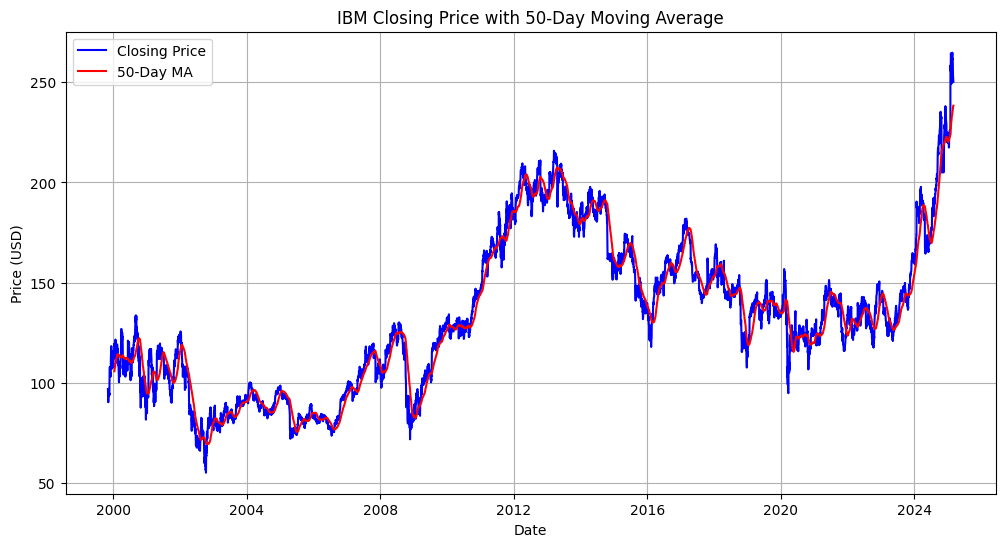

In [16]:
# Moving Average
df['MA50'] = df['Close'].rolling(window=50).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='red')
plt.title('IBM Closing Price with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

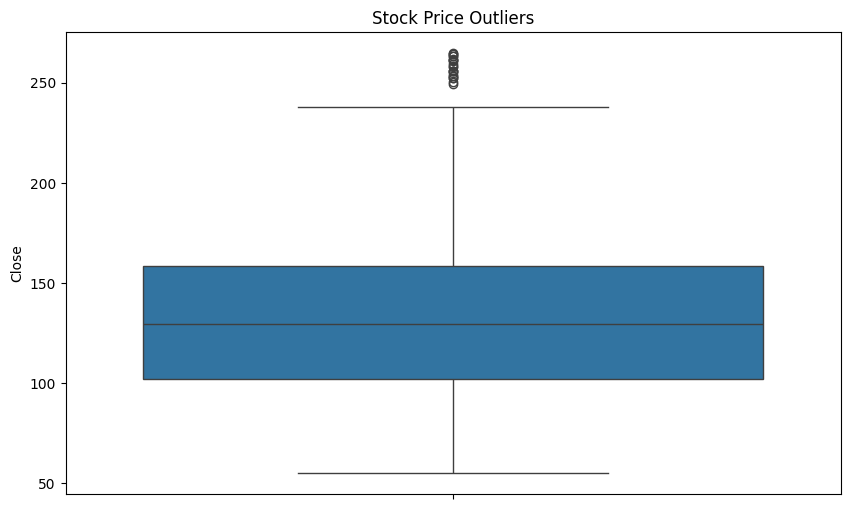

In [21]:
# Outliers detection
plt.figure(figsize=(10, 6))
sns.boxplot(df['Close'])
plt.title("Stock Price Outliers")
plt.show()

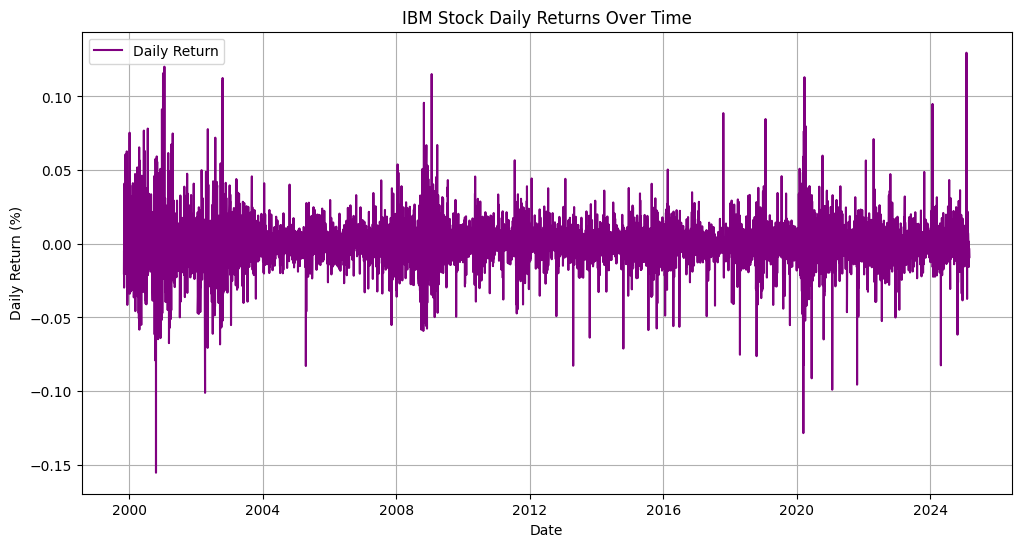

In [22]:
# Daily return
df['Daily_Return'] = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'], label='Daily Return', color='purple')
plt.title('IBM Stock Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()